In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the dataset
file_path = 'Road_Accidents_India.xlsx'
accidents_data = pd.read_excel(file_path)



In [5]:
# Drop unnecessary columns
columns_to_drop = ['Reference Number', 'Grid Ref: Easting', 'Grid Ref: Northing', '1st Road Class', 'Casualty Class']
accidents_data = accidents_data.drop(columns=columns_to_drop)

# Display first few rows and get summary info
print(accidents_data.head())
print(accidents_data.info())

# Handle missing values by dropping rows with any missing values
accidents_data = accidents_data.dropna()

# Remove duplicates
accidents_data = accidents_data.drop_duplicates()



   Number of Vehicles Accident Date  Time (24hr) Road Surface  \
0                   5     16-Jan-15         1205         Snow   
1                   5     16-Jan-15         1205         Snow   
2                   1     16-Jan-15         1732   Wet / Damp   
3                   2     17-Jan-15          930          Dry   
4                   2     17-Jan-15         1315   Wet / Damp   

                       Lighting Conditions          Weather Conditions  \
0          Daylight: street lights present  Snowing without high winds   
1          Daylight: street lights present  Snowing without high winds   
2  Darkness: street lights present and lit     Fine without high winds   
3          Daylight: street lights present     Fine without high winds   
4          Daylight: street lights present     Fine without high winds   

  Casualty Severity Sex of Casualty  Age of Casualty  \
0            Slight            Male               36   
1            Slight            Male               27

In [7]:
# Convert categorical columns to string type and apply label encoding
categorical_cols = accidents_data.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    accidents_data[col] = accidents_data[col].astype(str)

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    accidents_data[col] = le.fit_transform(accidents_data[col])
    label_encoders[col] = le  # Save encoders for potential inverse transforms later

# Define feature and target variables
X = accidents_data.drop(columns=['Casualty Severity', 'Accident Date'])
y = accidents_data['Casualty Severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Model Accuracy: 0.86
Precision: 0.80
Recall: 0.86
F1-Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.25      0.09      0.13        93
           2       0.88      0.97      0.92       691

    accuracy                           0.86       789
   macro avg       0.38      0.35      0.35       789
weighted avg       0.80      0.86      0.82       789



C:\Users\SEC\anaconda3\dipt\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SEC\anaconda3\dipt\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SEC\anaconda3\dipt\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\SEC\anaconda3\dipt\Lib

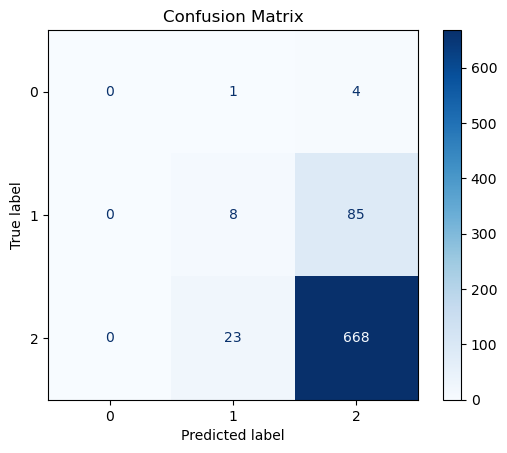

C:\Users\SEC\AppData\Local\Temp\ipykernel_16404\3277378136.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')


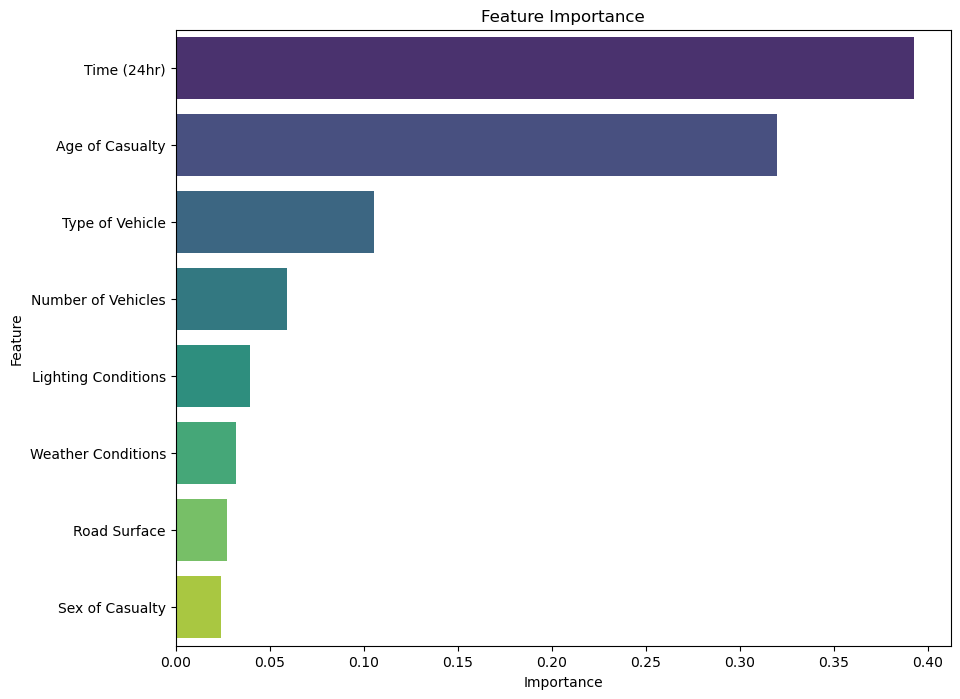

['random_forest_model.pkl']

In [9]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=rf_model.classes_).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance for Random Forest
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importances, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.show()

# Save the trained model
joblib.dump(rf_model, 'random_forest_model.pkl')


C:\Users\SEC\AppData\Local\Temp\ipykernel_16404\1295694131.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=accidents_data, x='Casualty Severity', palette="coolwarm")


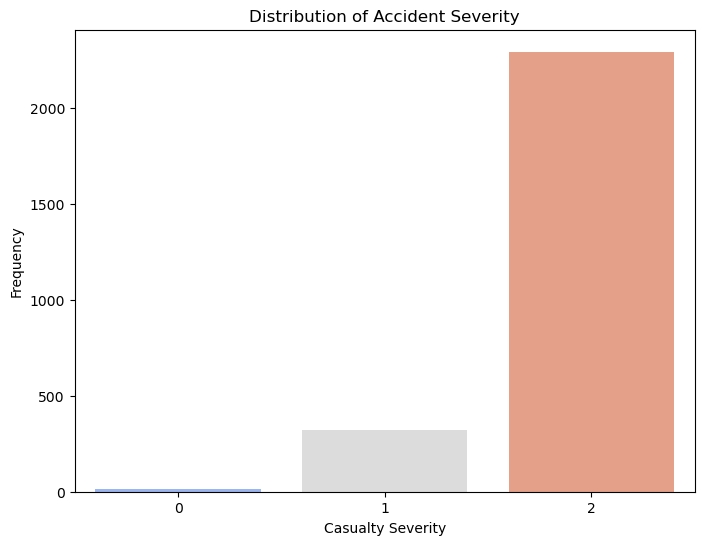

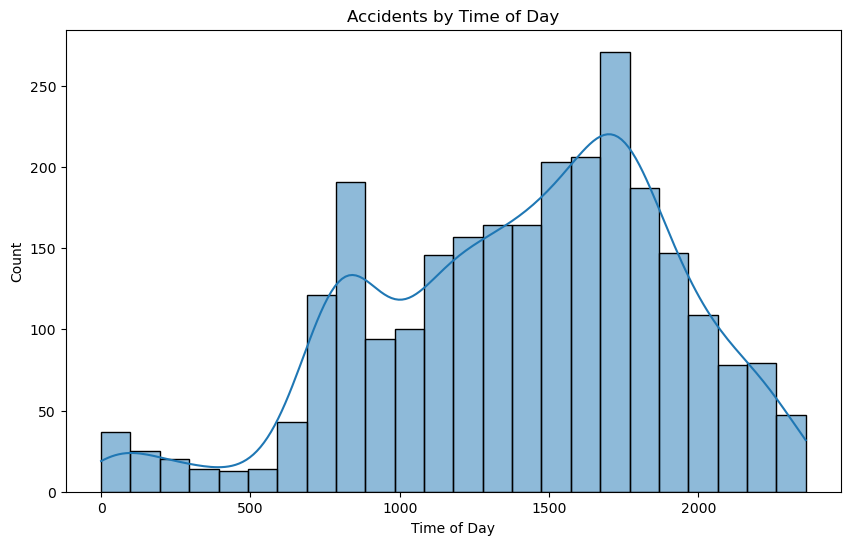

In [11]:
# Visualizations
# Accident Severity Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=accidents_data, x='Casualty Severity', palette="coolwarm")
plt.title('Distribution of Accident Severity')
plt.xlabel('Casualty Severity')
plt.ylabel('Frequency')
plt.show()

# Accident Distribution by Time of Day (if there's a time feature)
plt.figure(figsize=(10, 6))
sns.histplot(accidents_data['Time (24hr)'], bins=24, kde=True)  # Replace with time feature column name
plt.title('Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.show()
